<a href="https://colab.research.google.com/github/eispoohw/CS493-Math-Methods-in-ML/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [35]:
def linan(row1: str, row2: str) -> str:
    a11, a12, b1 = map(float, row1.split())
    a21, a22, b2 = map(float, row2.split())
    # define matrixes (AX = B)
    A = np.array([[a11, a12], [a21, a22]])
    B = np.array([b1,b2])
    # calculate rank(A) and rank(A|B)
    rankA = np.linalg.matrix_rank(A)
    rankAp = np.linalg.matrix_rank(np.concatenate((A, np.array([B]).T), axis=1))
    # Kronecker–Capelli theorem
    if rankA == rankAp:
        if rankA == 2:
            x, y = np.linalg.solve(A, B)
            return f"{np.around(x, decimals = 2)} {np.around(y, decimals = 2)}"
        else:
            return "[ERROR] an infinite number of solutions"
    else:
        return "[ERROR] the system is incompatible"

In [36]:
linan(input(), input())

3 6 9
2 2 2


'-1.0 2.0'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [37]:
def decorate_matrix(N: int) -> np.array:
    if N < 1:
        raise ValueError("N must be >= 1!")
    res = np.zeros((N-1, N-1))
    res = np.pad(res, pad_width=1, mode='constant', constant_values=1)
    return res

In [38]:
N = input()
decorate_matrix(int(N))

4


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [39]:
# !Coefficients!
a = 3
b = 4

def f(x):
    return pow(x+a, 2) - b

def g(x):
    return abs(f(x))

Исследовав f(x) и g(x) получим следующие минимума:

$$
\begin{cases}
x = -a & \in f(x) \\ 
x = -a & \in g(x), & b \le 0 \\
x = \pm \sqrt{b} - a & \in g(x), & b > 0
\end{cases}
$$

In [40]:
# define array of min coordinates
coordinates = np.array([float(-a)])

# leftDot, rightDot: function change points
# bound_segment: value to draw function graph
left_dot = -a
right_dot = -a
bound_segment = 1

if b > 0:
    # g(x) is piecewise-defined function
    left_dot -= np.sqrt(b)
    right_dot += np.sqrt(b)
    bound_segment += np.sqrt(b)/2
    coordinates = np.append(coordinates, [left_dot, right_dot])

print(coordinates)

[-3. -5. -1.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

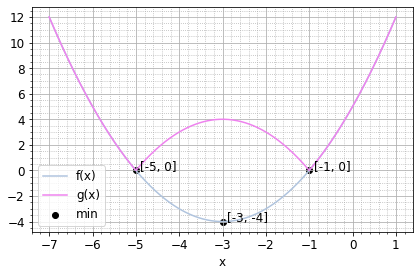

In [42]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 12})
x = np.linspace(left_dot - bound_segment,  right_dot + bound_segment, 500)

plt.plot(x, f(x), color='lightsteelblue', label='f(x)')
plt.plot(x, g(x), color='violet', label='g(x)')
plt.scatter(coordinates, f(coordinates), color='black', marker='o', label='min')
for c in coordinates:
    plt.text(c + 0.1, f(c), f"[{round(c)}, {round(f(c))}]")
plt.legend()

plt.minorticks_on()
plt.xlabel('x')
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

### 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

- Найдем вероятность того, что у одного человека монета выпадет одной и той же стороной 10 раз и обратную ей вероятность:
$$ P_{same \ side} = \left(\frac{1}{2}\right)^9, \quad \overline{P_{same \ side}} = 1 - \left(\frac{1}{2}\right)^9$$
- Найдем вероятность того, что ни у одного человека не выпала монета одной и той же стороной 10 раз
$$ P_{no \ cases} = \overline{P_{same \ side}}^{1000} = \left(1 - \left(\frac{1}{2}\right)^9\right)^{1000}$$
Следовательно, искомая вероятность: 
$$P = 1 - P_{no \ cases} = 1 - \left(1 - \left(\frac{1}{2}\right)^9\right)^{1000}$$

In [43]:
1 - np.power((1 - np.power(1/2, 9)),1000)

0.858440454732242

### 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?

- Найдем вероятность того, что у одного человека монета выпадет одной и той же стороной 8 раз из 10 и обратную ей:
$$ P_{ss8} = \frac{2(4+2+2)}{2^{10}} = \frac{2^4}{2^{10}} = \left(\frac{1}{2}\right)^6 \quad \overline{P_{ss8}} = 1 - \left(\frac{1}{2}\right)^6$$
Подобно первому получим искомую вероятность: 
$$P = 1 - P_{no \ cases} = 1 - \overline{P_{ss8}}^{1000} = 1 - \left(1 - \left(\frac{1}{2}\right)^6\right)^{1000}$$

In [44]:
1 - np.power(1-np.power(1/2, 6),1000)

0.9999998552643654

### 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

- Используем схему Бернулли:
$$ P = \begin{pmatrix}1000 \\ 3\end{pmatrix}\left(\frac{1}{2^{9}}\right)^{3}\left(1-\frac{1}{2^{9}}\right)^{997} $$


In [45]:
cnk = 1000 * 999 * 998 / 3 / 2
p = 1 / np.power(2, 9)
res = cnk * np.power(p, 3) * np.power(1 - p, 997)
print(res)

0.1762873858121736


## Проверим полученные значения методом Монте-Карло


In [ ]:
# Monte Carlo Method

experiments = 100000
counter1 = 0
counter2 = 0
counter3 = 0

for e in range(experiments):
    is2 = False
    threesame = 0
    for p in range(1000):
        if is2 and threesame > 3:
            break
        res = np.random.randint(0, 2, size=10)
        ressum = np.sum(res)
        if ressum == 0 or ressum == 10:
            threesame += 1
            is2 = True
        elif not is2 and ressum in [1, 2, 8, 9] and \
        (np.sum(res[:8]) in [0, 8] or np.sum(res[1:9]) in [0, 8] or np.sum(res[2:]) in [0, 8]):
            is2 = True
    counter1 += threesame != 0
    counter2 += is2
    counter3 += threesame == 3

print(f"{experiments} experiments done.")
print(f"[TASK 1] {counter1} cases. Probability: {counter1 / experiments}")
print(f"[TASK 2] {counter2} cases. Probability: {counter2 / experiments}")
print(f"[TASK 3] {counter3} cases. Probability: {counter3 / experiments}")

100000 experiments done.
[TASK 1] 85649 cases. Probability: 0.85649
[TASK 2] 100000 cases. Probability: 1.0
[TASK 3] 17432 cases. Probability: 0.17432


Результаты:
```
100 experiments done.
[TASK 1] 77 cases. Probability: 0.77
[TASK 2] 100 cases. Probability: 1.0
[TASK 3] 16 cases. Probability: 0.16
```
```
1000 experiments done.
[TASK 1] 848 cases. Probability: 0.848
[TASK 2] 1000 cases. Probability: 1.0
[TASK 3] 159 cases. Probability: 0.159
```
```
10000 experiments done.
[TASK 1] 8595 cases. Probability: 0.8595
[TASK 2] 10000 cases. Probability: 1.0
[TASK 3] 1737 cases. Probability: 0.1737
```
```
100000 experiments done.
[TASK 1] 85649 cases. Probability: 0.85649
[TASK 2] 100000 cases. Probability: 1.0
[TASK 3] 17432 cases. Probability: 0.17432
```



